# 混合カテゴリカル分布(Unigram Mixture)によるクラスタリング
k-meansでは、秋田駅に関する2つのクラスタの違いが明確でなかったが、以下では、
 - 秋田駅から観光地への交通・アクセスのクラスタ
 - 秋田駅付近の名産品・名物料理のクラスタというように解釈できるようになっている。

つまり、この分布モデルは、言語の分布をうまくとらえていると言える。  
（データセットは　create_dataset_forLDA.py で作成。）
 


In [1]:
import pandas as pd
import numpy as np
import em_algorithm

import codecs
import matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib
import pickle
import seaborn as sns


with open('dict_inv.pickle', 'rb') as f:
    dict_inv = pickle.load(f)
with open('dataset.pickle', 'rb') as f:
    all_reviews = pickle.load(f)


word_dic = {i:w for w, i in dict_inv.items()}
no_of_topics = 5
em_cat=em_algorithm.em_categorical(all_reviews,dict_inv,no_of_topics)
passes =20
theta,phi,qdk =em_cat.fit(passes)

for row in phi:
    w_dic = {word_dic[i]:np.round(val,3) for i,val in enumerate(row)}
    w_dic_sort = (sorted(w_dic.items(), reverse=True, key=lambda x:x[1]))
    print(w_dic_sort[:20])
   



no of step 1
no of step 2
no of step 3
no of step 4
no of step 5
no of step 6
no of step 7
no of step 8
no of step 9
no of step 10
no of step 11
no of step 12
no of step 13
no of step 14
no of step 15
no of step 16
no of step 17
no of step 18
no of step 19
no of step 20
[('秋田', 0.029), ('駅', 0.017), ('角館', 0.013), ('味', 0.012), ('屋敷', 0.012), ('武家', 0.011), ('展示', 0.009), ('通り', 0.009), ('館', 0.009), ('土産', 0.008), ('料理', 0.008), ('稲庭', 0.008), ('観光', 0.008), ('メニュー', 0.007), ('場所', 0.007), ('店内', 0.007), ('建物', 0.007), ('美味しい', 0.007), ('雰囲気', 0.007), ('地元', 0.006)]
[('ホテル', 0.031), ('秋田', 0.03), ('駅', 0.028), ('部屋', 0.021), ('利用', 0.019), ('朝食', 0.015), ('便利', 0.014), ('宿泊', 0.012), ('バス', 0.01), ('ビジネス', 0.01), ('清潔', 0.008), ('温泉', 0.008), ('良い', 0.008), ('階', 0.008), ('コンビニ', 0.007), ('街', 0.007), ('駐車', 0.007), ('フロント', 0.006), ('レストラン', 0.006), ('場所', 0.006)]
[('温泉', 0.044), ('湯', 0.027), ('露天風呂', 0.02), ('宿', 0.014), ('お湯', 0.012), ('乳頭', 0.012), ('日帰り', 0.012), ('風呂', 0.012), 

# k-meansのクラスタリング結果と比較する
秋田駅に関連する2つのクラスタの違いはクリアではない。


In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import japanize_matplotlib  # matplotlibを日本語対応させるライブラリ
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

# matplotlibのプロットサイズを設定
matplotlib.pyplot.rcParams['figure.figsize'] = (18.0, 10.0)

# CSVファイルからデータを読み込み、Pandas DataFrameに格納
score_df = pd.read_csv("fortravel_bow.csv", encoding='ms932', index_col=0)

# KMeansクラスタリングモデルを初期化（クラスタ数は5）
vec = KMeans(n_clusters=5)

# データフレームの特定の列に基づいてクラスタリングを実行し、予測ラベルを取得
pred_vec = vec.fit_predict(score_df.iloc[:, 3:])

# 予測ラベルをデータフレームに新しい列として追加
score_df["class"] = pred_vec

# 各クラスタの中心点を取得
centers = vec.cluster_centers_

# DataFrameのヘッダー（カラム名）をリストとして取得（予測ラベルとクラスタの中心を除く）
headers = score_df.columns.tolist()[3:-1]

import codecs

# 各クラスタの特徴を表すトップ20の要素を格納するリスト
center_top20 = []

# 各クラスタの中心点に対してループ
for c in centers:
    # クラスタの中心点の値をカラム名と対応付けて辞書に格納し、小数点以下1桁で丸める
    c_dic = {name: np.round(val, 1) for name, val in zip(headers, c)}

    # 辞書のアイテムを値に基づいて降順にソートし、トップ20を取得
    top_20 = sorted(c_dic.items(), key=lambda x: x[1], reverse=True)[:20]

    # 結果を出力
    print(top_20)

    # トップ20の結果をリストに追加
    center_top20.append(top_20)


/Users/shishishikakou/Downloads/text_mininngⅡ/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[('ホテル', 1.7), ('部屋', 1.0), ('利用', 0.6), ('朝食', 0.5), ('秋田', 0.5), ('駅', 0.5), ('宿泊', 0.4), ('ビジネス', 0.3), ('温泉', 0.3), ('風呂', 0.3), ('食事', 0.3), ('バイキング', 0.2), ('便利', 0.2), ('夕食', 0.2), ('客室', 0.2), ('広く', 0.2), ('快適', 0.2), ('料理', 0.2), ('浴場', 0.2), ('清潔', 0.2)]
[('屋敷', 1.6), ('武家', 1.4), ('角館', 1.2), ('桜', 0.7), ('通り', 0.6), ('観光', 0.3), ('場所', 0.2), ('展示', 0.2), ('建物', 0.2), ('時期', 0.2), ('秋田', 0.2), ('蔵', 0.2), ('見学', 0.2), ('館', 0.2), ('駅', 0.2), ('さくら', 0.1), ('カフェ', 0.1), ('ソメイヨシノ', 0.1), ('レストラン', 0.1), ('一番', 0.1)]
[('秋田', 1.8), ('駅', 1.3), ('利用', 0.2), ('観光', 0.2), ('階', 0.2), ('アクセス', 0.1), ('セット', 0.1), ('バス', 0.1), ('ビル', 0.1), ('ホテル', 0.1), ('ホーム', 0.1), ('メニュー', 0.1), ('ラーメン', 0.1), ('レストラン', 0.1), ('中心', 0.1), ('久保田', 0.1), ('佐竹', 0.1), ('便利', 0.1), ('側', 0.1), ('公園', 0.1)]
[('温泉', 2.7), ('湯', 1.2), ('宿', 0.5), ('露天風呂', 0.5), ('乳頭', 0.4), ('宿泊', 0.4), ('部屋', 0.4), ('風呂', 0.4), ('お湯', 0.3), ('利用', 0.3), ('日帰り', 0.3), ('泉', 0.3), ('入浴', 0.2), ('内湯', 0.2), ('料理', 0.2), (

# Unigram MixtureによるクラスタでPCAプロットを色分けする
全てのクラスタが、意味ベクトルの方向に沿って散らばっている（k-meansでは、クラスタの１つが中央部分に固まっていた）

no of step 1
no of step 2
no of step 3
no of step 4
no of step 5
no of step 6
no of step 7
no of step 8
no of step 9
no of step 10
[('温泉', 0.04), ('湯', 0.03), ('宿', 0.02), ('露天風呂', 0.02), ('風呂', 0.02), ('お湯', 0.01), ('バス', 0.01), ('乳頭', 0.01), ('入浴', 0.01), ('内湯', 0.01), ('利用', 0.01), ('宿泊', 0.01), ('川', 0.01), ('建物', 0.01), ('料理', 0.01), ('旅館', 0.01), ('日帰り', 0.01), ('有名', 0.01), ('泉', 0.01), ('混浴', 0.01)]
[('秋田', 0.02), ('駅', 0.02), ('バス', 0.01), ('像', 0.01), ('公園', 0.01), ('写真', 0.01), ('号', 0.01), ('国道', 0.01), ('城', 0.01), ('場所', 0.01), ('展望', 0.01), ('展示', 0.01), ('施設', 0.01), ('景色', 0.01), ('沿い', 0.01), ('湖', 0.01), ('田沢湖', 0.01), ('男鹿半島', 0.01), ('神社', 0.01), ('良い', 0.01)]
[('秋田', 0.03), ('味', 0.02), ('駅', 0.02), ('セット', 0.01), ('テーブル', 0.01), ('メニュー', 0.01), ('ランチ', 0.01), ('ラーメン', 0.01), ('レストラン', 0.01), ('丼', 0.01), ('利用', 0.01), ('名物', 0.01), ('土産', 0.01), ('地元', 0.01), ('場所', 0.01), ('多い', 0.01), ('店内', 0.01), ('料理', 0.01), ('普通', 0.01), ('有名', 0.01)]
[('ホテル', 0.03), ('利用'

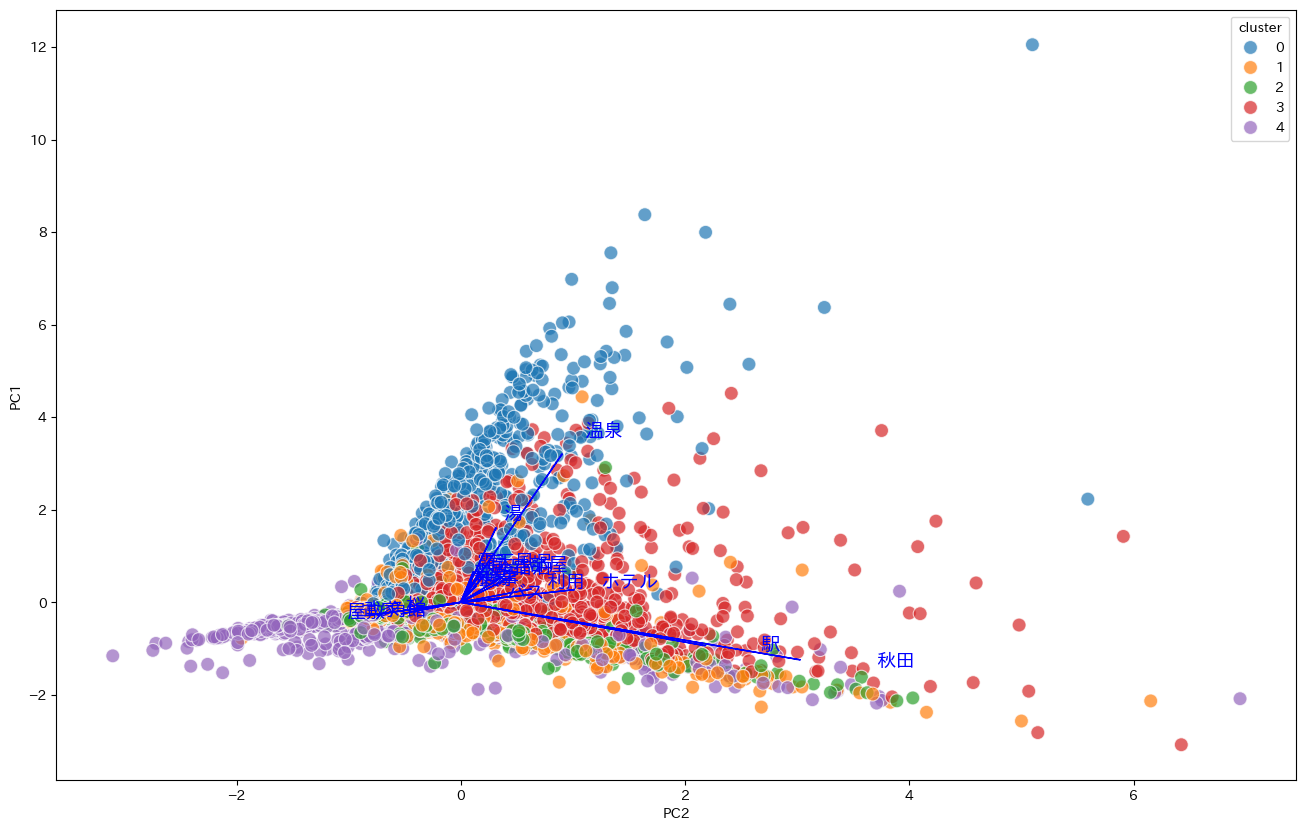

In [3]:
%run mixture_unigram.py

# トピックモデルによるクラスタリング
Unigram Mixtureと比較して、各クラスタ（トピック）は、相互の違いがはっきりする

pass :  0
pass :  1
pass :  2
pass :  3
pass :  4
pass :  5
pass :  6
pass :  7
pass :  8
pass :  9
pass :  10
pass :  11
pass :  12
pass :  13
pass :  14
pass :  15
pass :  16
pass :  17
pass :  18
pass :  19
pass :  20
pass :  21
pass :  22
pass :  23
pass :  24
pass :  25
pass :  26
pass :  27
pass :  28
pass :  29
pass :  30
pass :  31
pass :  32
pass :  33
pass :  34
pass :  35
pass :  36
pass :  37
pass :  38
pass :  39
topic id: 0
[('館', 0.019512380985185127), ('秋田', 0.019164676255166116), ('場所', 0.016433215502103513), ('展示', 0.015166934020743109), ('建物', 0.014087163139364074), ('展望', 0.012327654821188902), ('景色', 0.01085421053337794), ('駐車', 0.010242238620050345), ('車', 0.009925774262751793), ('写真', 0.009386646459003438), ('公園', 0.009274789053278745), ('紅葉', 0.009182532077956825), ('見学', 0.00911425632018051), ('歴史', 0.008823680926079148), ('城', 0.008451362622738677), ('日本', 0.008263753728539438), ('男鹿半島', 0.008059349532504381), ('時代', 0.00802821180791581), ('千秋公園', 0.0077249271

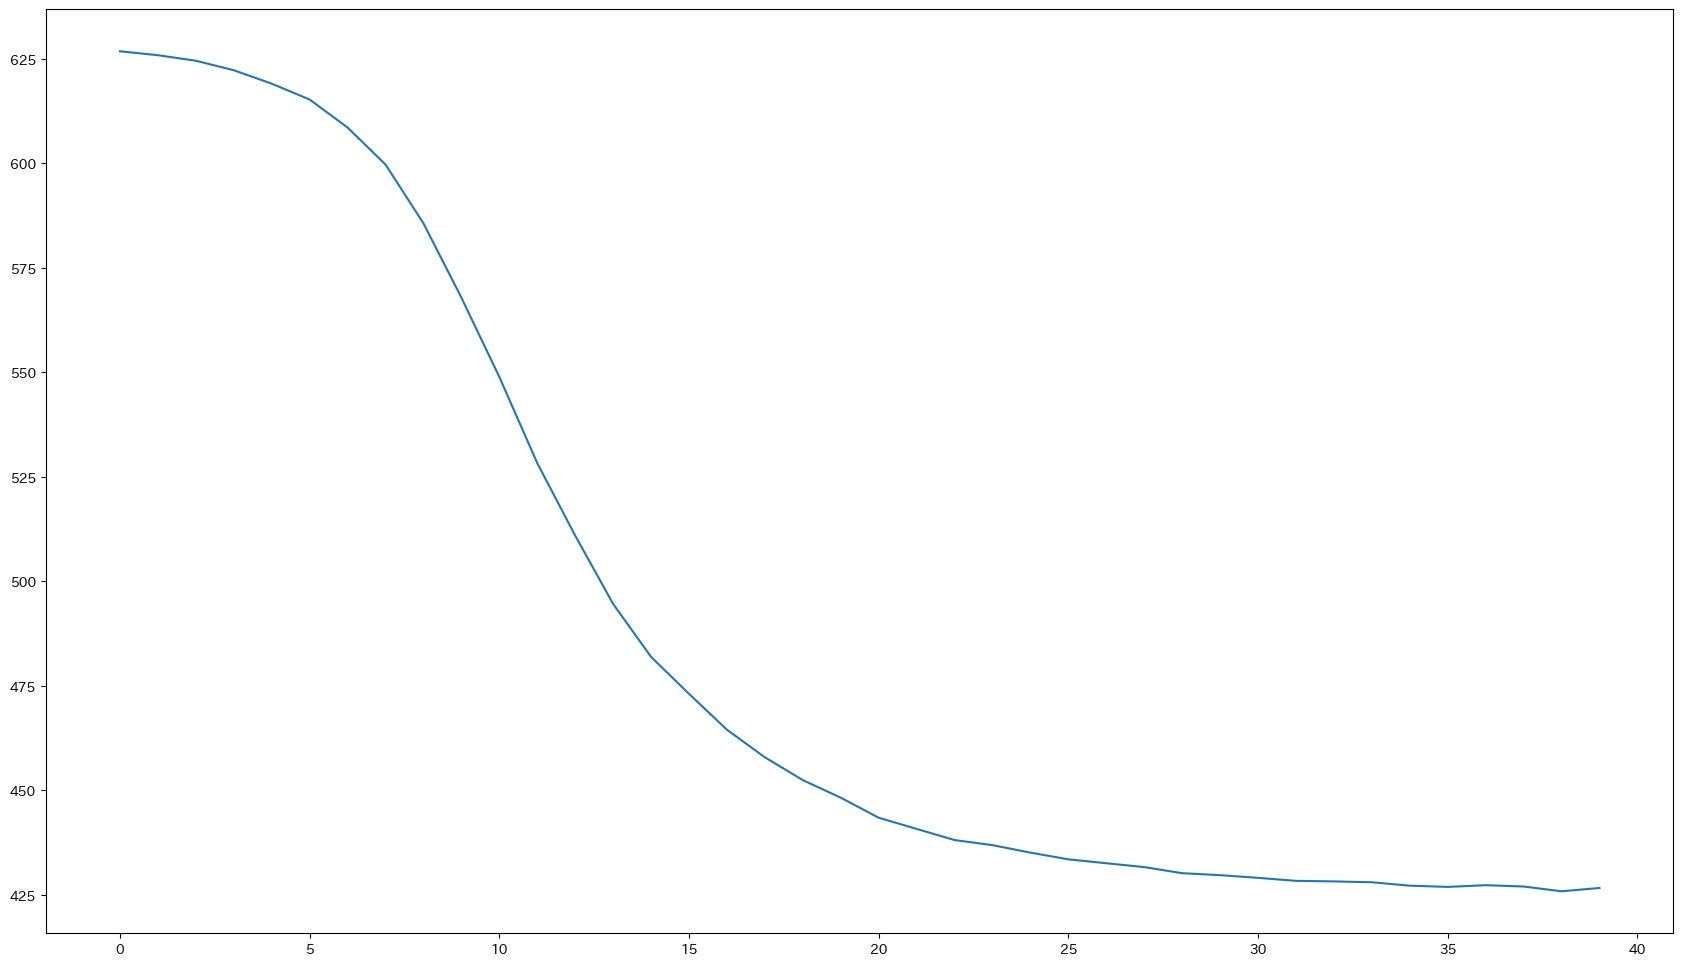

In [5]:
%run vbLDA.py
